<a href="https://colab.research.google.com/github/shriya67/CPP_PROGRAMMING/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score


In [18]:
df = pd.read_csv("/content/iris.csv")


In [19]:
X = df.drop('species', axis=1)
y = df['species']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [22]:
y_pred = clf.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

In [25]:
print("Decision Tree Classifier Results")
print("--------------------------------")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Decision Tree Classifier Results
--------------------------------
Accuracy: 1.0000
F1 Score (macro): 1.0000

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



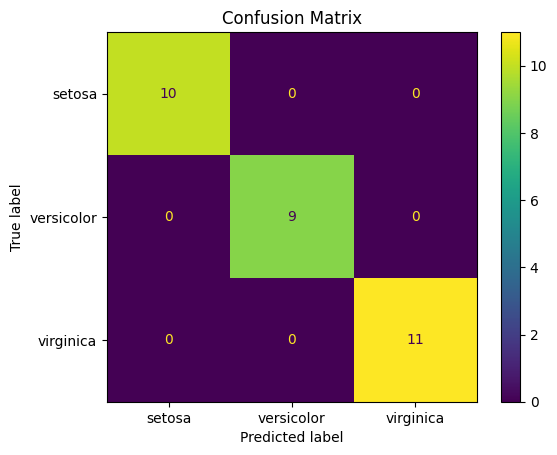

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Display confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

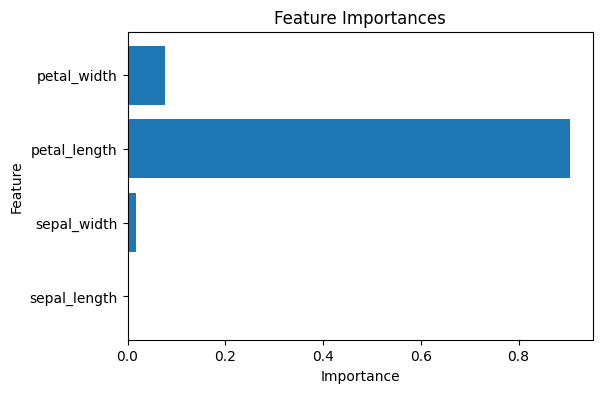

In [29]:
plt.figure(figsize=(6, 4))
plt.barh(X.columns, clf.feature_importances_)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

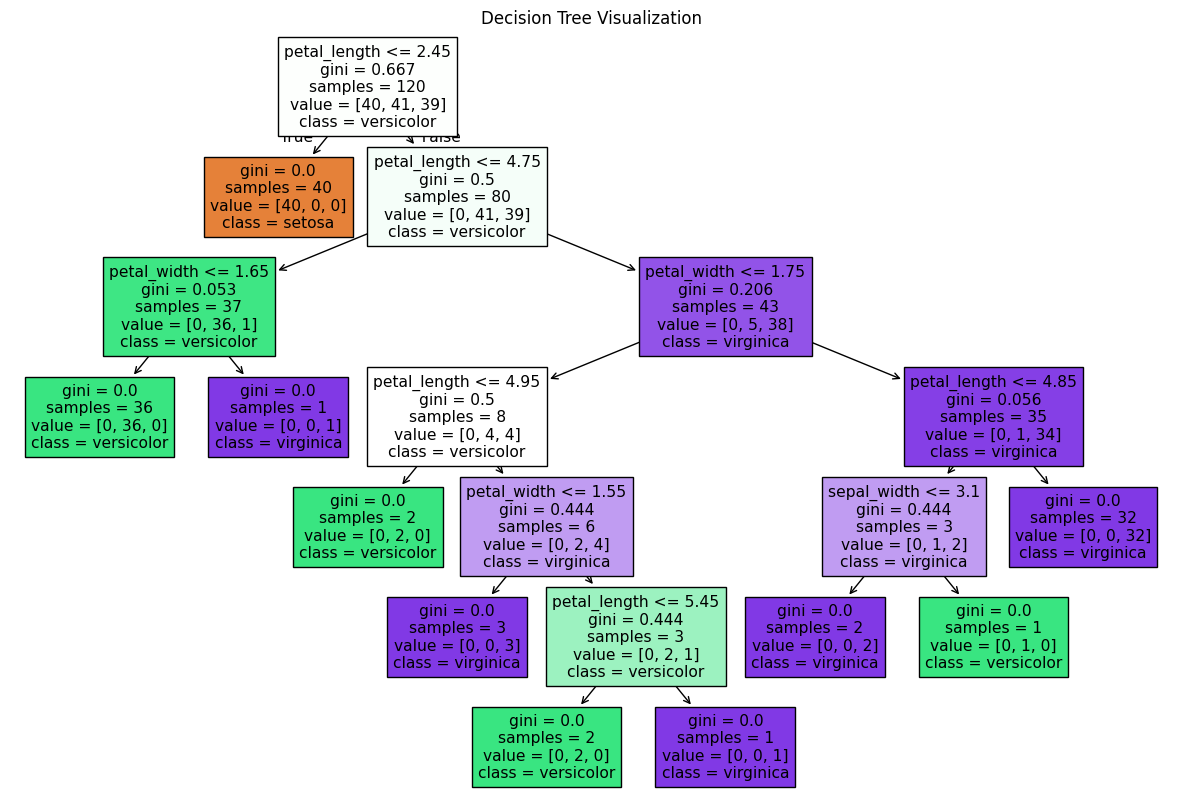

In [30]:
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4, 5],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [1, 2, 3]
}

# GridSearchCV for best parameters
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy"
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
clf = grid_search.best_estimator_


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [32]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Accuracy Scores: [0.96666667 0.96666667 0.93333333 0.86666667 1.        ]
Mean CV Accuracy: 0.9467


In [33]:
from sklearn.tree import export_text

tree_rules = export_text(clf, feature_names=list(X.columns))
print("\nDecision Tree Rules:\n")
print(tree_rules)



Decision Tree Rules:

|--- petal_length <= 2.45
|   |--- class: setosa
|--- petal_length >  2.45
|   |--- petal_length <= 4.75
|   |   |--- sepal_length <= 5.05
|   |   |   |--- class: versicolor
|   |   |--- sepal_length >  5.05
|   |   |   |--- class: versicolor
|   |--- petal_length >  4.75
|   |   |--- petal_width <= 1.75
|   |   |   |--- petal_length <= 5.05
|   |   |   |   |--- class: versicolor
|   |   |   |--- petal_length >  5.05
|   |   |   |   |--- class: virginica
|   |   |--- petal_width >  1.75
|   |   |   |--- petal_length <= 4.85
|   |   |   |   |--- class: virginica
|   |   |   |--- petal_length >  4.85
|   |   |   |   |--- class: virginica



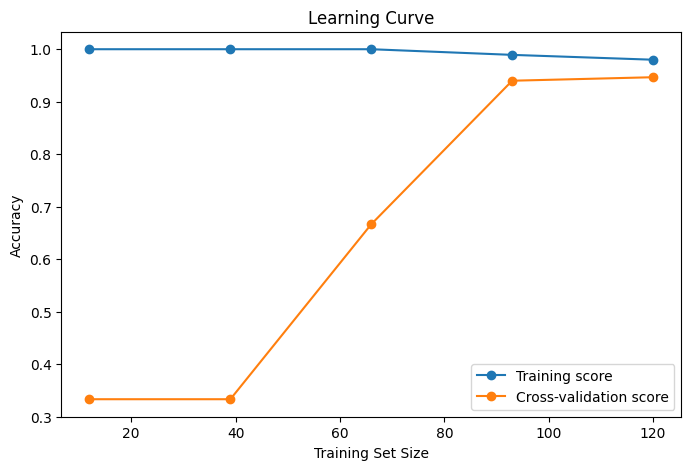

In [34]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()
